In [1]:
#####################################################################################################
##### This is a test to use machine learning to achieve similar functions as adaptive smoothing #####
#####                                  It containes various functions                           #####
#####################################################################################################

%matplotlib nbagg
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First try to generate the pattern we want #

def multivariant_gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

<IPython.core.display.Javascript object>


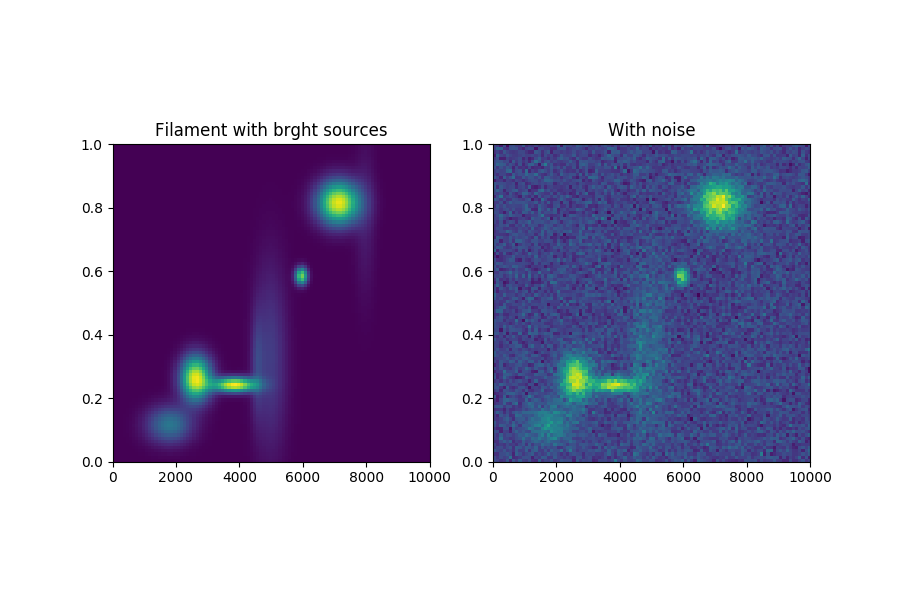

In [3]:
###########################################
#### GENERATE TRAIN AND TEST DATA SETS ####
###########################################

from random import randint 
np.random.seed(0)
y, x = np.mgrid[:100, :100]
    
test_file = open('data/test_batch', 'ab')

for i in range(1200):
    a = np.multiply(0.1, [randint(10, 30), randint(10, 30), randint(10, 30), randint(10, 30), randint(10, 30), randint(1, 5), randint(1, 5), randint(1, 5)])
    b = np.multiply(0.1, [[randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(1, 1000), randint(1, 1000)], [randint(300, 800), randint(300, 800)], [randint(300, 800), randint(300, 800)], [randint(300, 800), randint(300, 800)]])
    c = np.multiply(0.1, [[randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(10, 50), randint(10, 50)], [randint(100, 200), randint(10, 50)], [randint(100, 200), randint(10, 50)], [randint(100, 200), randint(10, 50)]])
    
    z = multivariant_gaussian(a[0], b[0][0], b[0][1], c[0][0], c[0][1])(y, x) + \
        multivariant_gaussian(a[1], b[1][0], b[1][1], c[1][0], c[1][1])(y, x) + \
        multivariant_gaussian(a[2], b[2][0], b[2][1], c[2][0], c[2][1])(y, x) + \
        multivariant_gaussian(a[3], b[3][0], b[3][1], c[3][0], c[3][1])(y, x) + \
        multivariant_gaussian(a[4], b[4][0], b[4][1], c[4][0], c[4][1])(y, x) + \
        multivariant_gaussian(a[5], b[5][0], b[5][1], c[5][0], c[5][1])(y, x) + \
        multivariant_gaussian(a[6], b[6][0], b[6][1], c[6][0], c[6][1])(y, x) + \
        multivariant_gaussian(a[7], b[7][0], b[7][1], c[7][0], c[7][1])(y, x)
    if i < 1000:
        data_file = open(r'data/data_batch_%d'% (i % 10), 'ab')
        z1 = z + np.random.normal(0., 0.1, z.shape) * np.random.uniform(1,4)
        z1.tofile(data_file)
        z1.tofile(data_file)
        data_file.close()
    else:   
        z1 = z + np.random.normal(0., 0.1, z.shape) * np.random.uniform(1,4)
        z1.tofile(test_file)
        z1.tofile(test_file)
        
test_file.close()
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.imshow(z, origin='lower', interpolation='nearest', extent=[0,1e4,0,1], aspect = 1e4)
plt.title("Filament with bright sources")
plt.subplot(1, 2, 2)
plt.imshow(z1, origin='lower', interpolation='nearest',extent=[0,1e4,0,1], aspect = 1e4)
plt.title("With noise")